In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# read in the data
df = pd.read_csv('/Users/hayleeham/Documents/what-is-a-data-scientist/data/multipleChoiceResponses.csv', \
                 low_memory=False)

In [3]:
[print(item) for item in zip(df.columns, df.iloc[0])]

('Time from Start to Finish (seconds)', 'Duration (in seconds)')
('Q1', 'What is your gender? - Selected Choice')
('Q1_OTHER_TEXT', 'What is your gender? - Prefer to self-describe - Text')
('Q2', 'What is your age (# years)?')
('Q3', 'In which country do you currently reside?')
('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
('Q5', 'Which best describes your undergraduate major? - Selected Choice')
('Q6', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
('Q6_OTHER_TEXT', 'Select the title most similar to your current role (or most recent title if retired): - Other - Text')
('Q7', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
('Q7_OTHER_TEXT', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text')
('Q8', 'How many years of experience

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
# Are you a data scientist?
df_yes = df[df['Q26'] == 'Definitely yes']
df_no = df[df['Q26'] == 'Definitely not']

In [15]:
# Q11
# Analyze and understand data to influence product or business decisions
# Build and/or run a machine learning service that operationally improves my product or workflows
# Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
# Build prototypes to explore applying machine learning to new areas
# Do research that advances the state of the art of machine learning
# None of these activities are an important part of my role at work

## Make a joyplot of time spent for yes DS vs not DS

In [10]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [11]:
df_joy_yes = df_yes[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_yes['Q34_Part_1'] = pd.to_numeric(df_joy_yes['Q34_Part_1'])
df_joy_yes['Q34_Part_2'] = pd.to_numeric(df_joy_yes['Q34_Part_2'])
df_joy_yes['Q34_Part_3'] = pd.to_numeric(df_joy_yes['Q34_Part_3'])
df_joy_yes['Q34_Part_4'] = pd.to_numeric(df_joy_yes['Q34_Part_4'])
df_joy_yes['Q34_Part_5'] = pd.to_numeric(df_joy_yes['Q34_Part_5'])
df_joy_yes['Q34_Part_6'] = pd.to_numeric(df_joy_yes['Q34_Part_6'])
df_joy_yes = df_joy_yes.dropna()
df_joy_yes = df_joy_yes.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

df_joy_no = df_no[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_no['Q34_Part_1'] = pd.to_numeric(df_joy_no['Q34_Part_1'])
df_joy_no['Q34_Part_2'] = pd.to_numeric(df_joy_no['Q34_Part_2'])
df_joy_no['Q34_Part_3'] = pd.to_numeric(df_joy_no['Q34_Part_3'])
df_joy_no['Q34_Part_4'] = pd.to_numeric(df_joy_no['Q34_Part_4'])
df_joy_no['Q34_Part_5'] = pd.to_numeric(df_joy_no['Q34_Part_5'])
df_joy_no['Q34_Part_6'] = pd.to_numeric(df_joy_no['Q34_Part_6'])
df_joy_no = df_joy_no.dropna()
df_joy_no = df_joy_no.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

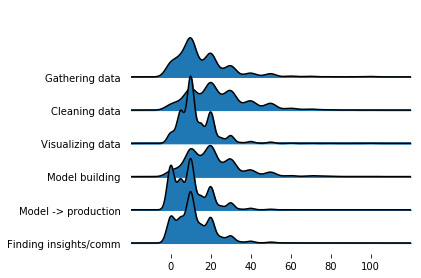

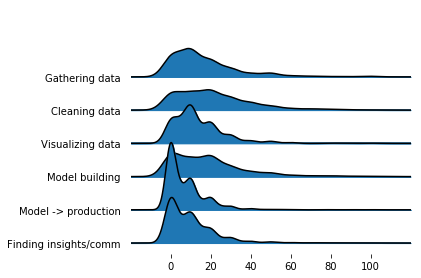

In [12]:
%matplotlib inline
fig, axes = joypy.joyplot(df_joy_yes)
fig, axes = joypy.joyplot(df_joy_no)

## Meeting with Mike
Approach like a multivariate problem   
Do principal components and see if you can reduce the dimension further.   
Chi square test is difference in proportions. So it would be share of events in two conditions. People falling into certain bucket.   
For Q11 -- use binomial for each one -- whether or not they marked it. -- You are comparing two treatments -- but is there an expanded one for multiple categories but probably not work for being able to mark multiple.   
They are responding with proportions so that is weird for the Chi square   
Mahalobis distance -- converting to probability space
-- don't average the obvservations
multivariate t-test using original vectors or multivariate regression   
PCA to understand which vectors explain most of the variance   

PCA all original vectors -- no averaging   
Multi t-test all original vectors -- no averaging

In [34]:
df_yes_Q34 = df_yes[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_no_Q34 = df_no[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_yes_Q34 = df_yes_Q34[~pd.isnull(df_yes_Q34['Q34_Part_1'])]
df_no_Q34 = df_no_Q34[~pd.isnull(df_no_Q34['Q34_Part_1'])]

df_yes_Q34['DS'] = 1
df_no_Q34['DS'] = 0

df_Q34 = df_yes_Q34.append(df_no_Q34)

In [55]:
## PCA -- drop last category and run on remaining in order to reduce dimensionality
## nice if you can reduce down to two dimensions so you can look at plots
## X data is Q_34
## Y data is Q_26

import numpy as np
from sklearn.decomposition import PCA
X = df_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
Y = df_Q34[['DS']]
pca = PCA()
pca.fit(X)  
X = pca.transform(X)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)

[0.34944271 0.30078755 0.16232807 0.12396402 0.06347765]
[1287.34090964 1194.36069628  877.40960753  766.74931731  548.67603265]


In [75]:
# use first two components and plot everything with color for DS status
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(dict(
    x=X[:, 0],
    y=X[:, 1],
    colors = ['red' if target == 1 else 'blue' for target in Y['DS'].tolist()],
    labels = ['Yes DS' if target == 1 else 'No DS' for target in Y['DS'].tolist()]
))

p = figure()

p.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.6,
          line_color=None, legend='labels', source=source)

show(p)


Loading BokehJS ...

In [79]:
# which features are the most important? Each row is a PC and each column is a variable
# Looking at PC1 -- variables 2 and 4 are the most important.
# These variables are cleaning data and model building/model selection
print(pca.components_)

[[-0.23785272 -0.6691907  -0.02135723  0.6867259   0.15349689]
 [ 0.76676659 -0.56719612 -0.054047   -0.29457352  0.02574722]
 [-0.48366053 -0.38257019  0.45974774 -0.58400259  0.25939454]
 [-0.11861509  0.03205565 -0.70793698 -0.18191073  0.67129473]
 [ 0.32786893  0.28824442  0.53299159  0.25977575  0.67664883]]


In [88]:
# t-test with first component and DS/non-DS
# PC1 seems to be capturing the difference between cleaning data and model building/model selection.
# The direction of the t-test is consistent with the idea that PC1 is capturing seniority level or skill level
# and that Yes DS has a higher average PC1 value than No DS
# PC2 is differentiating between data gathering vs data cleaning & model building/modeling selection. 
# Possibly even lower seniority or maybe just a different role altogether.
from scipy import stats
stats.ttest_ind(X[:4201, 1],X[4201:, 1])

Ttest_indResult(statistic=-5.156169366514056, pvalue=2.611463633467223e-07)

In [86]:
# Yes DS mean of PC
sum(X[:4201, 1])/len(X[:4201, 1])

-0.5991139901781496

In [87]:
# No DS mean of PC
sum(X[4201:, 1])/len(X[4201:, 1])

2.209725963773842